<a href="https://colab.research.google.com/github/Gopal-star2005/AI-Instagram-Analyzer/blob/main/AI_InstaAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of rows
n = 500

# Generate synthetic data for each column
length = np.random.randint(20, 300, size=n)                 # post caption length in characters
hashtags_count = np.random.randint(0, 20, size=n)           # number of hashtags
emojis_used = np.random.randint(0, 10, size=n)              # count of emojis
time_posted = np.random.randint(0, 24, size=n)              # hour of day posted (0-23)
followers_count = np.random.randint(100, 50000, size=n)     # follower count
likes = np.random.randint(0, 5000, size=n)                  # number of likes
comments = np.random.randint(0, 1000, size=n)               # number of comments
post_type = np.random.choice(['image', 'video', 'carousel'], size=n)  # categorical post type

# Create pandas DataFrame
insta_data = pd.DataFrame({
    'length': length,
    'hashtags_count': hashtags_count,
    'emojis_used': emojis_used,
    'time_posted': time_posted,
    'followers_count': followers_count,
    'likes': likes,
    'comments': comments,
    'post_type': post_type
})

# Save to CSV file
insta_data.to_csv('insta_data.csv', index=False)

# Optional: display head
print(insta_data.head())


   length  hashtags_count  emojis_used  time_posted  followers_count  likes  \
0     122               2            2           10             4458   2630   
1     290              12            1           12            28582   2563   
2     126              12            1           16            32217   3292   
3      91              17            5            7            23264   4621   
4     208              19            0           20            32010   3586   

   comments post_type  
0       104  carousel  
1       201     image  
2       449  carousel  
3       818     image  
4       842     video  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   length           500 non-null    int64 
 1   hashtags_count   500 non-null    int64 
 2   emojis_used      500 non-null    int64 
 3   time_posted      500 non-null    int64 
 4   followers_count  500 non-null    int64 
 5   likes            500 non-null    int64 
 6   comments         500 non-null    int64 
 7   post_type        500 non-null    object
dtypes: int64(7), object(1)
memory usage: 31.4+ KB
length             0
hashtags_count     0
emojis_used        0
time_posted        0
followers_count    0
likes              0
comments           0
post_type          0
dtype: int64
Decision Tree Confusion Matrix:
 [[33  5]
 [ 4 58]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1   

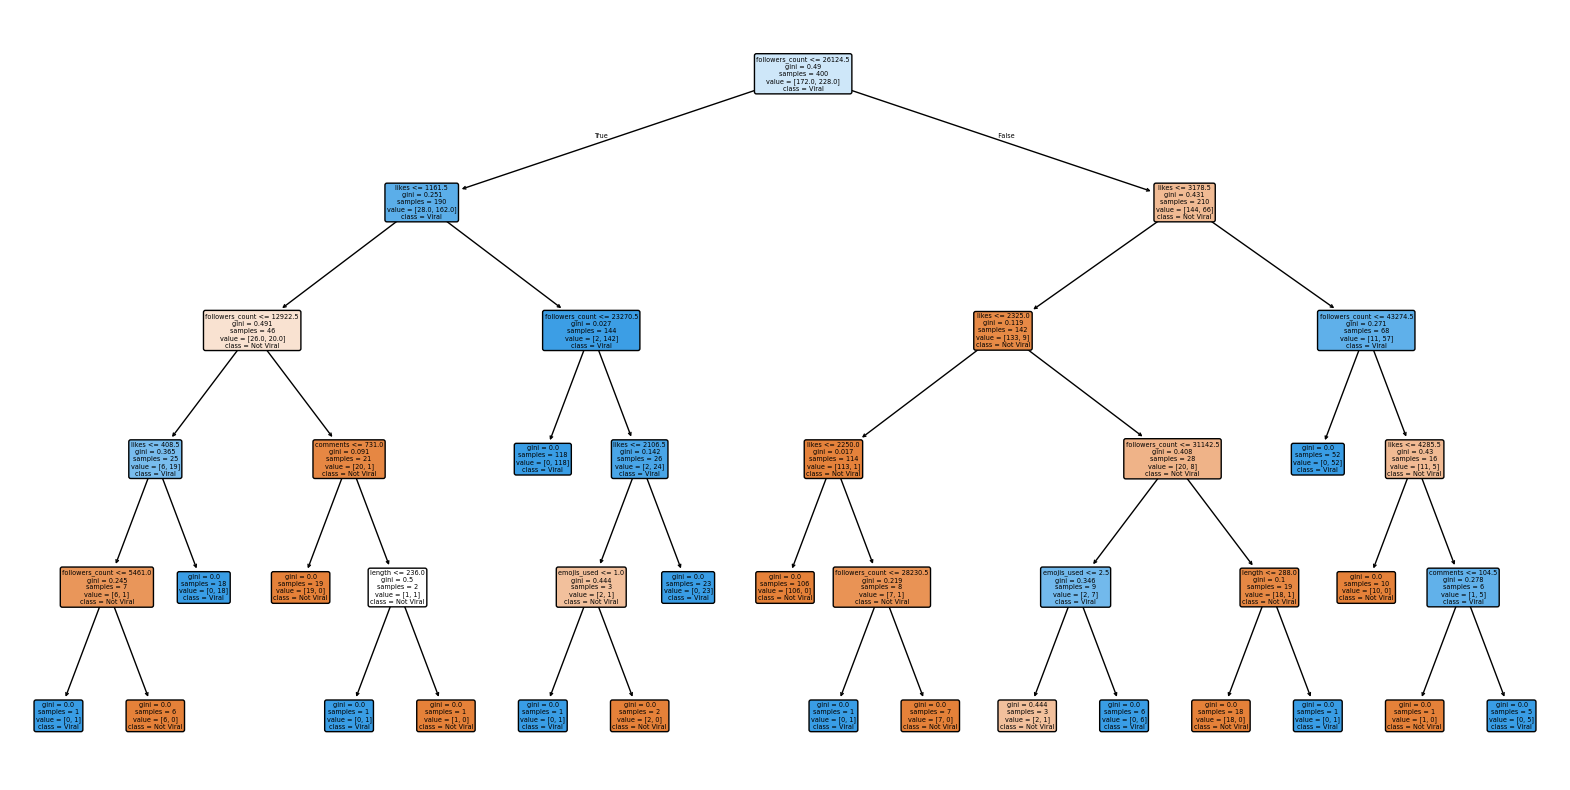

Random Forest Confusion Matrix:
 [[30  8]
 [ 1 61]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87        38
           1       0.88      0.98      0.93        62

    accuracy                           0.91       100
   macro avg       0.93      0.89      0.90       100
weighted avg       0.92      0.91      0.91       100



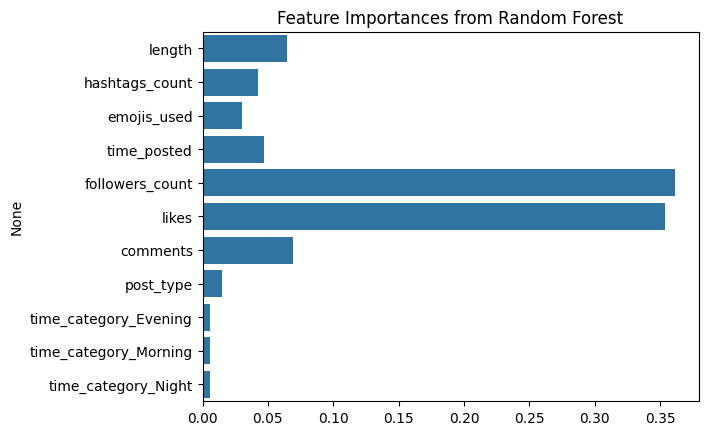

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load Data
df = pd.read_csv("insta_data.csv")

# 3. Data Preprocessing
df.info()
print(df.isnull().sum())

# Map 'post_type' to numerical categories
df['post_type'] = df['post_type'].map({'image': 0, 'video': 1, 'carousel': 2})

# Convert 'time_posted' into time categories:
# Night (22-4), Morning (5-11), Afternoon (12-17), Evening (18-21)
def time_category(hour):
    if (hour >= 5) and (hour <= 11):
        return 'Morning'
    elif (hour >= 12) and (hour <= 17):
        return 'Afternoon'
    elif (hour >= 18) and (hour <= 21):
        return 'Evening'
    else:
        return 'Night'

df['time_category'] = df['time_posted'].apply(time_category)

# Create dummy variables for time_category, drop first category to avoid dummy variable trap
df = pd.get_dummies(df, columns=['time_category'], drop_first=True)

# 4. Feature & Target Separation
df['engagement'] = (df['likes'] + df['comments']) / df['followers_count']
df['went_viral'] = df['engagement'].apply(lambda x: 1 if x > 0.1 else 0)

X = df.drop(['went_viral', 'engagement'], axis=1)
y = df['went_viral']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training – Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Decision Tree visualization
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Viral', 'Viral'], rounded=True)
plt.show()

# 7. Model Training – Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# 8. Feature Importance Plot
importances = rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.show()
